# Seoul Bike Fair ML Analysis

## Install Appropriate Packages

In [117]:
# data manip
import pandas as pd 
import numpy as np 

# plotting
import matplotlib.pyplot as plt 
import seaborn as sns 

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression # base model, more advanced model to be imported elsewhere
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # metrics
from sklearn.model_selection import cross_val_score, GridSearchCV # cv score & model tuning

## Data Analysis

In [118]:
df = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape') # had to modify encoding param because of error
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Should add hour to date somehow, convert to datetime and set as index. Then encode categorical data and further, visualize the data.

In [120]:
from datetime import datetime

# append string hour to date and convert to datetime
df["Datetime"] = df.apply(lambda x: x["Date"] + " " + str(x["Hour"]) + ":00", axis = 1) # %m/%d/%Y %h
df["Datetime"]

0        01/12/2017 0:00
1        01/12/2017 1:00
2        01/12/2017 2:00
3        01/12/2017 3:00
4        01/12/2017 4:00
              ...       
8755    30/11/2018 19:00
8756    30/11/2018 20:00
8757    30/11/2018 21:00
8758    30/11/2018 22:00
8759    30/11/2018 23:00
Name: Datetime, Length: 8760, dtype: object

In [121]:
df["Datetime"] = df.apply(lambda x: datetime.strptime(x["Datetime"], "%d/%m/%Y %H:%M"), axis = 1)
df["Datetime"]

0      2017-12-01 00:00:00
1      2017-12-01 01:00:00
2      2017-12-01 02:00:00
3      2017-12-01 03:00:00
4      2017-12-01 04:00:00
               ...        
8755   2018-11-30 19:00:00
8756   2018-11-30 20:00:00
8757   2018-11-30 21:00:00
8758   2018-11-30 22:00:00
8759   2018-11-30 23:00:00
Name: Datetime, Length: 8760, dtype: datetime64[ns]

In [122]:
df = df.set_index("Datetime", drop = True)
df = df.drop(["Date", "Hour"], axis = 1)
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Datetime,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [123]:
# awesome, we have now reformat our dataset so our columns could use their appropriate datatypes and our index is set as a timeseries.
# Now, we must encode the categories. The seasons we can do in order of each season throughout the year, we must utilize one-hot encoding for this, since the seasons do not have priority
# over the other.
df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [124]:
df["Holiday"] = df.apply(lambda x: np.where(x["Holiday"].strip().lower() == "no holiday", 0.0, 1.0), axis = 1)
df["Functioning Day"] = df.apply(lambda x: np.where(x["Functioning Day"].strip().lower() == "no", 0.0, 1.0), axis = 1)
df["Holiday"] = df["Holiday"].astype(float)
df["Functioning Day"] = df["Functioning Day"].astype(float)
df[["Holiday", "Functioning Day"]].head()

,Holiday,Functioning Day
Datetime,,
2017-12-01 00:00:00,0.0,1.0
2017-12-01 01:00:00,0.0,1.0
2017-12-01 02:00:00,0.0,1.0
2017-12-01 03:00:00,0.0,1.0
2017-12-01 04:00:00,0.0,1.0


In [125]:
# With all of the formatting out of the way, lets check out this dataset
df.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315,0.966324
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.216537,0.180404
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000


In [126]:
df.head().index

DatetimeIndex(['2017-12-01 00:00:00', '2017-12-01 01:00:00',
               '2017-12-01 02:00:00', '2017-12-01 03:00:00',
               '2017-12-01 04:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [127]:
df.tail().index

DatetimeIndex(['2018-11-30 19:00:00', '2018-11-30 20:00:00',
               '2018-11-30 21:00:00', '2018-11-30 22:00:00',
               '2018-11-30 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

## Visualization and Analysis

In [128]:
import plotly.express as px
fig = px.scatter(df, x=df.index, y="Rented Bike Count", trendline = 'rolling', color = "Seasons", trendline_color_override="black", trendline_options = {'window':24*7}) # window = weekly rolling average
fig.show()

With the seasons displayed above, we can see a clear distinction between the frequency of use of rented bikes. As winter subsides in the sping, the usage increases. The end of spring and beginning of summer show a peak in usage. But then, possibly as the temperature increases, there is a small drop, quickly followed by a steep increase in the beginning of autumn, and finally the decrease which leads to the low season by the end of autumn.

In [129]:
df = pd.get_dummies(df, columns = ["Seasons"])
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Datetime,,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,1.0,False,False,False,True
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,1.0,False,False,False,True
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,1.0,False,False,False,True
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,1.0,False,False,False,True
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,1.0,False,False,False,True


In [130]:
for column in df.columns:
    if "Seasons" in column:
        df[column] = df[column].astype(int)

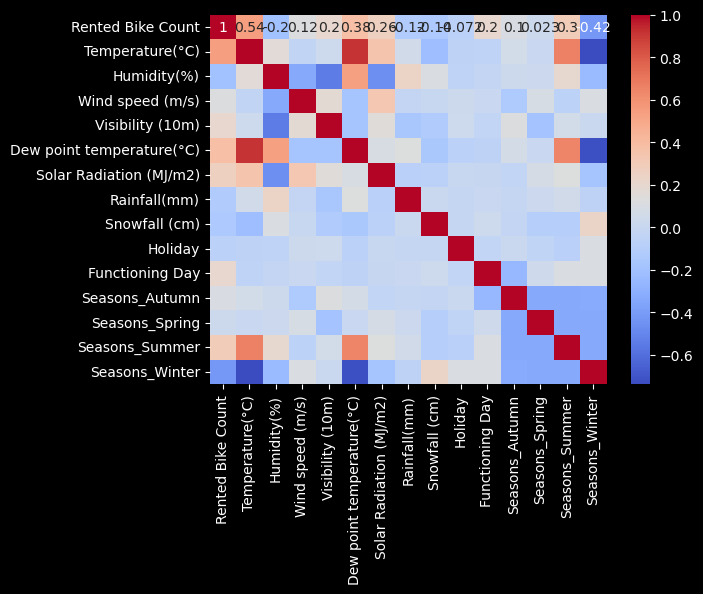

In [131]:
# let's see linear relationships to guide our analysis

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

Only summer and winter seem to have strong correlations with remperature, which is surprising. Also, Summer and Winter have high correlations with eachother. Because of this, one of them should be dropped as to not cause confusion in the model. Other than that, the linear correlations between these features are not that strong, so we should opt-in for a non-linear model.

After testing the model, it was decided to remove the seasons. Firstly because there is almost no correlation between the season and the rental bike count,e xcept for in the winter. But secondly, since weather can change on a hourly basis, and this weather not fully correlate with the season it is occurring in, it makes more sense to use hourly weather metrics because seasons only affect the bike count on a seasonal scale.

In [132]:
df["Hour"] = df.index.hour

In [133]:
df["Hour"]

Datetime
2017-12-01 00:00:00     0
2017-12-01 01:00:00     1
2017-12-01 02:00:00     2
2017-12-01 03:00:00     3
2017-12-01 04:00:00     4
                       ..
2018-11-30 19:00:00    19
2018-11-30 20:00:00    20
2018-11-30 21:00:00    21
2018-11-30 22:00:00    22
2018-11-30 23:00:00    23
Name: Hour, Length: 8760, dtype: int32

In [134]:
df["Morning"] = df.apply(lambda x: 1 if x["Hour"]<12 else 0, axis = 1)

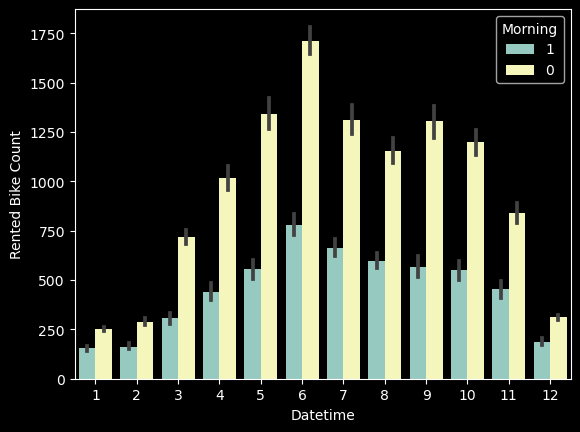

In [135]:
sns.barplot(x=df.index.month, y = df["Rented Bike Count"], hue = df["Morning"].astype(str))
plt.show()

This addition was done after mediocre metrics on the model. I realized that the time at which the bikes are being rented was not counted since it was only part of the index. Of course, seasons could be told through weather data but time cannot as it could be cold in the morning, but it could be very cold any day in winter months. Therefore, I wanted to add a simple indicator of time as to not make the problem too complex. I thought of a morning flag, and clearly there is a great difference in renting in the morning vs. after 12pm irrespective of the time of the year.

In [136]:
df = df.drop("Hour", axis = 1)

## Modeling

### Prepare Data

In [137]:
# Data Splitting
X = df.drop("Rented Bike Count", axis = 1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [138]:
# Scaling/Data Prep
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Base Model

In [139]:
# Fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

# predictions and metrics
y_preds = lr.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_preds)}, R2: {r2_score(y_test, y_preds)}, MSE: {mean_squared_error(y_test, y_preds)}")

MAE: 339.9103881278539, R2: 0.505426863997785, MSE: 206062.0363869863


It is off by a lot! We knew this would happen though, since there are barely any linear relations between features. Let us try out a model better suited for such data.

In [140]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [141]:
models = [
    Ridge(),
    Lasso(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

cv = KFold(n_splits=10, shuffle=True, random_state=42)  # Cross-validation setup

In [142]:
results = {}
for model in models:
    scores = cross_validate(model, X, y, cv=cv, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
    results[model.__class__.__name__] = scores

best_model_name, best_score = max(results.items(), key=lambda item: item[1]['test_r2'].mean())
best_model_index = list(results.keys()).index(best_model_name)  # Convert keys to list
best_model = models[best_model_index]

/Users/marconardoneguerra/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.913e+05, tolerance: 3.279e+05

/Users/marconardoneguerra/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.764e+05, tolerance: 3.279e+05

/Users/marconardoneguerra/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.568e+05, tolerance: 3.297e+05

/

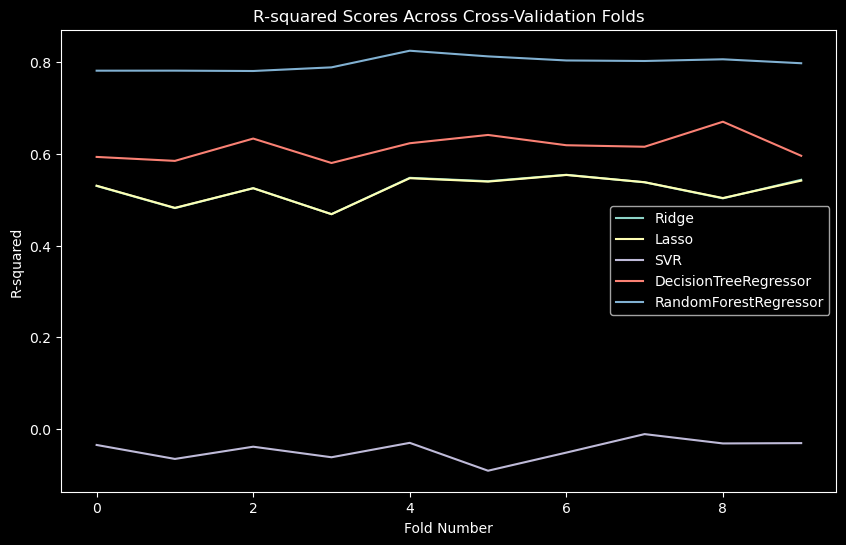

In [143]:
plt.figure(figsize=(10, 6))
for model_name, scores in results.items():
    plt.plot(scores['test_r2'], label=model_name)
plt.title("R-squared Scores Across Cross-Validation Folds")
plt.xlabel("Fold Number")
plt.ylabel("R-squared")
plt.legend()
plt.show()

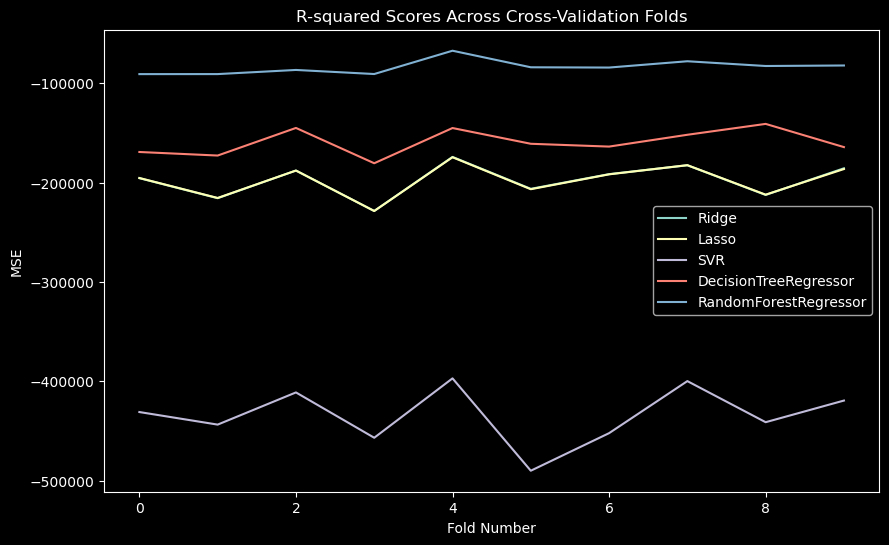

In [154]:
plt.figure(figsize=(10, 6))
for model_name, scores in results.items():
    plt.plot(scores['test_neg_mean_squared_error'], label=model_name)
plt.title("R-squared Scores Across Cross-Validation Folds")
plt.xlabel("Fold Number")
plt.ylabel("MSE")
plt.legend()
plt.show()

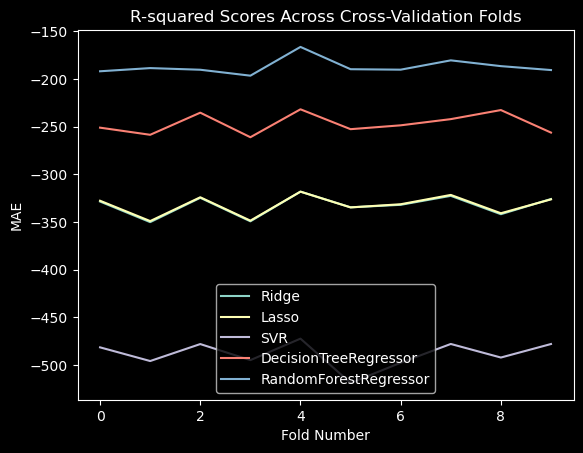

In [155]:
for model_name, scores in results.items():
    plt.plot(scores['test_neg_mean_absolute_error'], label=model_name)
plt.title("R-squared Scores Across Cross-Validation Folds")
plt.xlabel("Fold Number")
plt.ylabel("MAE")
plt.legend()
plt.show()

As we can see, the randomforestregressor seems to have the best performance among the rest of the models. Let's perform some hyperparameter tuning to see how much better performance we could get.

### Hyperparameter Tuning for best model

In [148]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_jobs': [-1]
}

In [149]:
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')  # Use appropriate scoring metric
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [150]:
best_model = RandomForestRegressor(**best_params)

In [151]:
from joblib import dump

dump(best_model, 'best_nonlinear_model.joblib')

['best_nonlinear_model.joblib']

In [152]:
best_model.fit(X_train, y_train)
y_preds = best_model.predict(X_test)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: 0.778575414941665
Mean Squared Error: 92255.72030070722
Mean Absolute Error: 193.1174369900207


## Model Analysis

## SHAP Scores

In [159]:
import shap

X_test = pd.DataFrame(X_test, columns = df.drop("Rented Bike Count", axis = 1).columns)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_test)

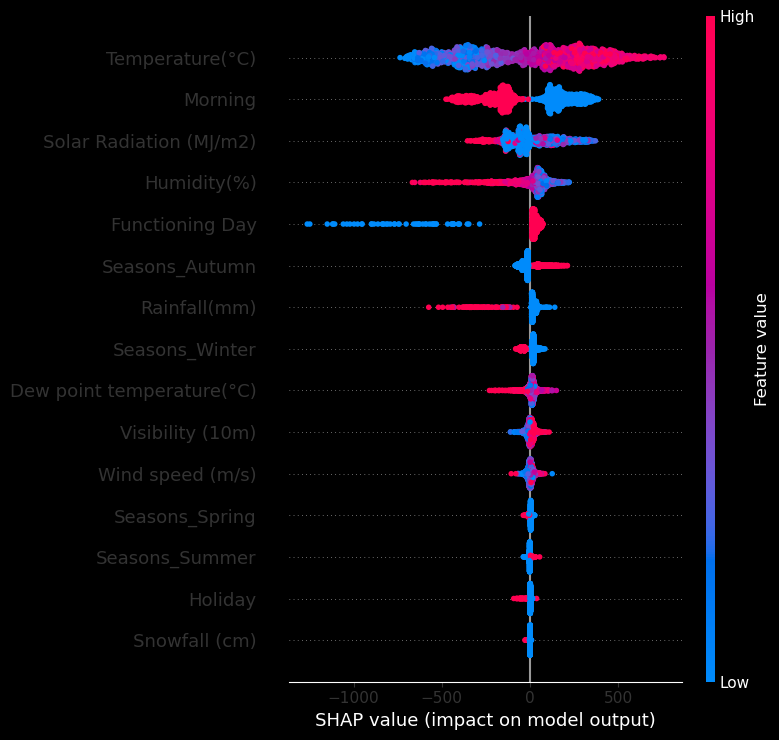

In [160]:
shap.summary_plot(shap_values, X_test)  # Summary bar plot

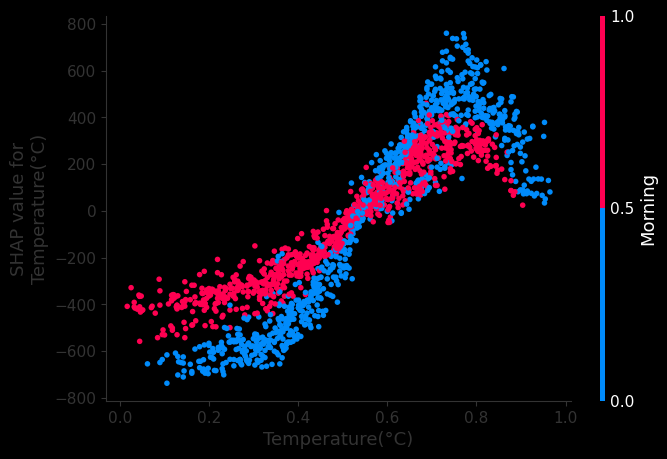

In [163]:
shap.dependence_plot("Temperature(°C)", shap_values.values, X_test)

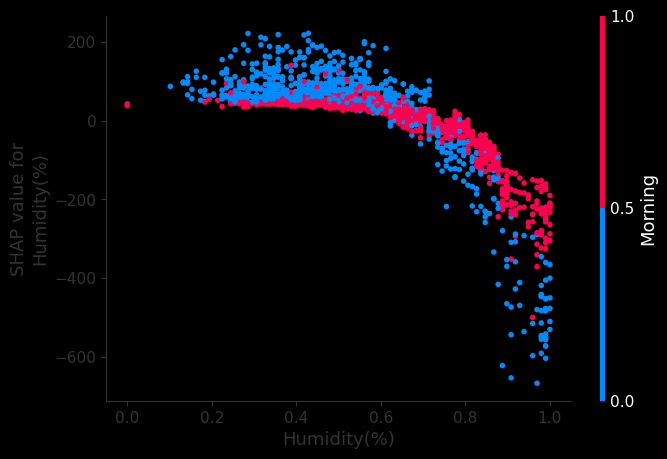

In [173]:
shap.dependence_plot('Humidity(%)', shap_values.values, X_test)

Through the above plots, we can make a few observations.
* Firstly, it is clear to see in the first "beeswarm" plot that both Temperature, Morning (0/1) and Humidity are the largest drivers and suppressors of bike rentals.
    * For temperature, it is apparent that high temperatures drive renting and low temperatures suppress it. Medium temperatures are also good drivers.
    * For morning, it is clear that bike rentals are to be amde less in the morning and more in the evening.
    * For humidity, we can clearly see that high humidity can drive rentals way down, as datapoints get to a very low shap value.
* Next, it is clear in our second plot that, generally speaking, individuals are dissuaded from renting biked in lower temperatures. However, as temperatures get higher, specifically around the 80th percent point of the distribution, there is an enormous peak in demand of bikes no matter what the time is, but this quickly subsides as we reach the tail 20% of temperatures.
* Finally, Humidity generally does not influence bike rentals as much around 80% of its distribution, but in the 20% tail end, it suppresses bike rentals immensely.